 ***<p style="background-color:#00FFFF; font-family:Gabriola, cursive; color:#000080; font-size:150%; text-align:left; border-radius:10px 50px; padding:10px;">Cryptocurrency Liquidity Prediction for Market Stability</p>***

This project focuses on predicting **cryptocurrency liquidity**, a continuous variable that depends on historical market data, trading patterns, and potentially external signals (like social media). It involves:
- Feature engineering for temporal and market features
- Forecasting using regression or deep learning models
- Stability analysis through liquidity prediction

# Problem Statement

Cryptocurrency markets are highly volatile. Liquidity — the ability to buy/sell without major price change — is vital for stability. Low liquidity can result in sharp price swings, increased risk, and potential market manipulation.

The objective of this project is to **build a machine learning model that predicts liquidity levels** of cryptocurrencies using various indicators such as:
- Historical prices and volumes
- Transaction and volatility patterns
- Exchange listing frequency
- Social media trends

This model aims to **detect early signs of liquidity crises** to help **traders, exchanges, and institutions manage risk more effectively.**

# Data Lifecycle

The full pipeline for this project follows these 10 stages:

1. **Data Collection** – Gather historical crypto data (2016–2017) on prices, volume, etc.
2. **Data Preprocessing** – Clean, handle missing values, normalize, format.
3. **EDA** – Understand patterns, volatility, correlations, seasonality.
4. **Feature Engineering** – Add liquidity indicators, rolling stats, ratios.
5. **Model Selection** – Choose appropriate regression/forecasting models.
6. **Model Training** – Fit on training data with engineered features.
7. **Evaluation** – Use RMSE, MAE, R² for validation.
8. **Hyperparameter Tuning** – Grid/random search for optimization.
9. **Testing/Validation** – Apply model to unseen data, analyze stability.
10. **Deployment** – Use Flask/Streamlit for a local interactive tool.

# Project Description

This is a real-world predictive analytics project to monitor **market stability** through **liquidity forecasting** in cryptocurrency markets. 

Using historical crypto trading data, we will:
- Understand how price and volume reflect liquidity
- Engineer liquidity-specific features (volatility, rolling average, volume ratios)
- Build predictive models to classify or forecast low-liquidity phases
- Design a prototype system to forecast risks and liquidity shocks

This tool will enable **better risk management**, **trading decisions**, and possibly **prevent financial instability** in fast-moving digital asset environments.

# Dataset

**Source**: Historical Cryptocurrency Dataset from 2016–2017  
**Link**: [Google Drive Dataset](https://drive.google.com/drive/folders/10BRgPip2Zj_56is3DilJCowjfyT6E9AM)


--- 

# 1. Data Loading and Initial Exploration

### 1.1 Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

The first step is to import the necessary Python libraries for data manipulation, visualization, and machine learning. This includes libraries like pandas for data handling, numpy for numerical operations, matplotlib and seaborn for visualization, and warnings to suppress any unwanted warnings.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

### 1.2 Loading the Dataset (2016 and 2017)

Next, we load the dataset into the pandas DataFrame. The dataset URL is provided, and we'll use `pd.read_csv()` to load it. Once the dataset is loaded, we display the first few rows to verify its structure.

In [4]:
df_2016 = pd.read_csv(r'C:\Users\ACER\OneDrive\Documents\my codess\Data-Analytics-Assignment\Crypto-Liquidity-Prediction-ML-Project\data\raw\coin_gecko_2022-03-16.csv')
df_2017 = pd.read_csv(r'C:\Users\ACER\OneDrive\Documents\my codess\Data-Analytics-Assignment\Crypto-Liquidity-Prediction-ML-Project\data\raw\coin_gecko_2022-03-17.csv')

### 1.3 Concatenating the datasets

In this step, we will combine multiple datasets into a single DataFrame using `pd.concat()`. This is useful when data is split across multiple files or sources but shares the same structure, allowing us to perform unified analysis on the complete dataset.

In [5]:
df = pd.concat([df_2016, df_2017], ignore_index=True)

### 1.4 Displaying the First Few Rows of the Dataset

After concatenating the datasets, we will use print `(df.head())` to check the first few rows.This helps us quickly verify the combined dataset structure and data correctness.


In [10]:
print(df.head())

       coin symbol         price     1h    24h     7d    24h_volume  \
0   Bitcoin    BTC  40859.460000  0.022  0.030  0.055  3.539076e+10   
1  Ethereum    ETH   2744.410000  0.024  0.034  0.065  1.974870e+10   
2    Tether   USDT      1.000000 -0.001 -0.001  0.000  5.793497e+10   
3       BNB    BNB    383.430000  0.018  0.028  0.004  1.395854e+09   
4  USD Coin   USDC      0.999874 -0.001  0.000 -0.000  3.872274e+09   

        mkt_cap        date  
0  7.709915e+11  2022-03-16  
1  3.271044e+11  2022-03-16  
2  7.996516e+10  2022-03-16  
3  6.404382e+10  2022-03-16  
4  5.222214e+10  2022-03-16  


### 1.5 Checking the Dataframe Information

We will use `df.info()` to get a quick summary of the dataset. This includes the number of rows, columns, data types of each column, and counts of non-null values. This step helps us understand the structure of the data and help us to identify the missing values.

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   symbol      1000 non-null   object 
 2   price       1000 non-null   float64
 3   1h          993 non-null    float64
 4   24h         993 non-null    float64
 5   7d          992 non-null    float64
 6   24h_volume  993 non-null    float64
 7   mkt_cap     1000 non-null   float64
 8   date        1000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 70.4+ KB
None


### 1.6 Checking for Missing Values

Here, we will check how many missing (null) values are present in each column using `df.isnull().sum()`. This helps us understand if and where data is incomplete so we can decide how to handle those gaps.

In [11]:
print(df.isnull().sum())

coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64


### 1.7 Handling Missing Values

In this step, we will remove all the rows that contain any missing values using `dropna()`. This ensures our dataset is clean and ready for an accurate analysis. After dropping, we will print the new shape of the DataFrame to get to know how many rows remain.

In [12]:
df.dropna(inplace=True)
print("Dataset shape after removing missing values:", df.shape)

Dataset shape after removing missing values: (992, 9)


### 1.8 Converting the ‘date’ column to datetime format

In this, we will be Converting the `‘date’` column from `string/object` type to `pandas datetime format` allows us to perform time-based operations and analysis more efficiently.

In [13]:
df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)

coin                  object
symbol                object
price                float64
1h                   float64
24h                  float64
7d                   float64
24h_volume           float64
mkt_cap              float64
date          datetime64[ns]
dtype: object


### 1.9 Checking for duplicate records

We will check the dataset for any duplicate rows to ensure data quality and avoid redundant information in analysis.

In [14]:
print("Number of duplicate rows found:", df.duplicated().sum())

Number of duplicate rows found: 0


# Exploratory Data Analysis (EDA)

### 1.10 Generating Summary Statistics

We will use the `describe()` function to get a quick overview of the dataset’s numerical columns. This step will helps us understand the distribution, central tendency, and spread of the data by showing the count, mean, standard deviation, min, max, and quartiles. It’s useful for spotting any irregularities or anomalies before further analysis.

In [15]:
print(df.describe())

              price          1h         24h          7d    24h_volume  \
count  9.920000e+02  992.000000  992.000000  992.000000  9.920000e+02   
mean   6.200521e+02    0.009682    0.024018    0.023558  2.884638e+08   
min    1.484000e-09   -0.704000   -0.646000   -0.558000  0.000000e+00   
25%    1.940547e-01    0.001000    0.001000   -0.041000  1.764198e+06   
50%    1.095000e+00    0.006000    0.016000   -0.000500  8.328741e+06   
75%    6.955000e+00    0.019000    0.035000    0.037000  3.947222e+07   
max    4.121727e+04    0.095000    0.577000    4.608000  5.793497e+10   
std    4.421998e+03    0.026917    0.058668    0.229781  2.771176e+09   

            mkt_cap                           date  
count  9.920000e+02                            992  
mean   3.783951e+09  2022-03-16 11:58:32.903225856  
min    6.577043e+07            2022-03-16 00:00:00  
25%    1.158501e+08            2022-03-16 00:00:00  
50%    2.131953e+08            2022-03-16 00:00:00  
75%    5.972493e+08     

### What I Learned from the Summary

- **Price Range is Huge:** Certain cryptos are very inexpensive (down to **$0.000000001**), while others are quite costly, with the highest price being over **$41,000**.

- **Market Behavior is Unstable:** The changes in price over **1 hour**, **24 hours**, and **7 days** have both positive and negative values. This means that some coins appreciated in value, whereas others depreciated within these timelines. Interestingly enough, one coin went up by more than **4,600% in one week**!

- **Trading Volume is Extremely Varied:** The **24-hour trading volume** has an enormous range—from **$0** to more than **$57 billion**, indicating extreme contrasts in coin popularity and liquidity.

- **Market Cap Distribution:** Market capitalization also differs quite sharply. While the **median is approximately $3.78 billion**, the highest is more than **$776 billion**, suggesting the presence of large coins such as **Bitcoin** or **Ethereum**.

- **Time Span of Data:** The dataset covers only **two days** which is **March 16 and 17, 2022**. Therefore, the insights must be understood as **snapshots**, not as long-term trends.


### 1.11 Correlation Heatmap of Numerical Features


In this step, we will generate a **correlation heatmap** to examine how different numerical variables such as `price`, `volume`, `market cap`, and percentage changes (1h, 24h, 7d) are related to each other.

This heatmap provides a visual summary of pairwise correlation coefficients:

- Values **closer to +1** indicate a strong **positive relationship**.
- Values **closer to -1** indicate a strong **negative relationship**.
- Values **around 0** imply **little to no correlation**.

Understanding these relationships is crucial for identifying **patterns**, detecting **multicollinearity**, and selecting **relevant features** for further analysis or predictive modeling.

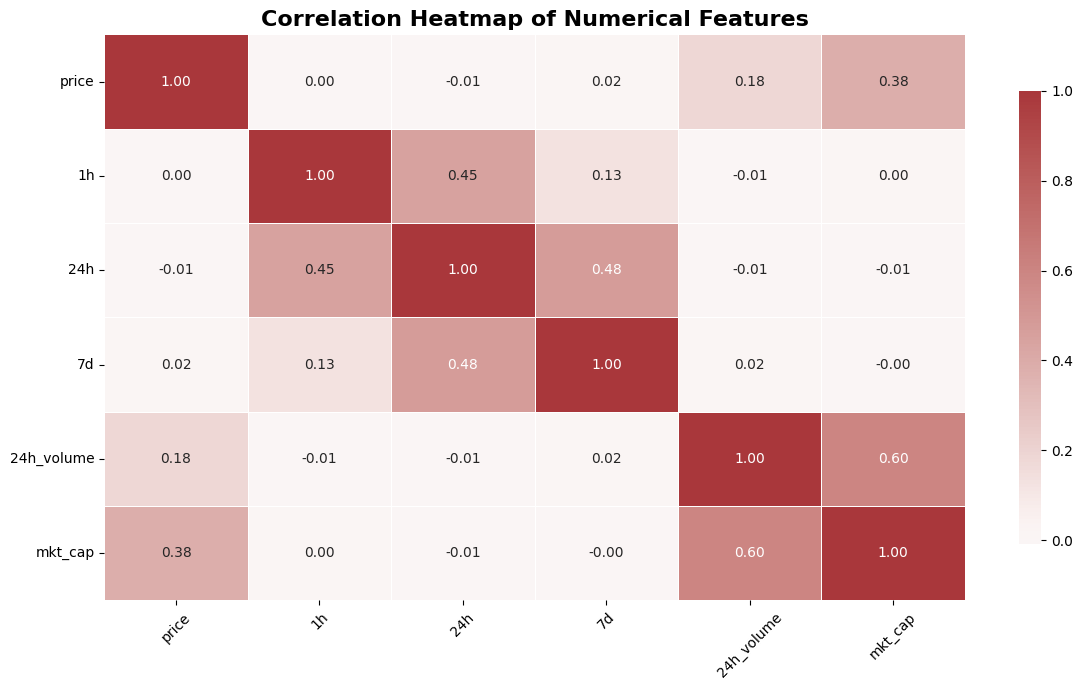

In [16]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 7))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='vlag', center=0, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
save_path = r"C:\Users\ACER\OneDrive\Documents\my codess\Data-Analytics-Assignment\Crypto-Liquidity-Prediction-ML-Project\outputs\figures\correlation_heatmap.png"
plt.savefig(save_path)
plt.show()

### Observations from the Correlation Heatmap

- There is a strong positive correlation between **market cap** and **price** when the price increases, market cap also rises.

- The **24-hour trading volume** is clearly correlated with market capitalization, indicating that coins with higher market cap tend to have larger trading volumes.

- Price changes over **1 hour**, **24 hours**, and **7 days** show little correlation with price or trading volume.

- Some numerical features are strongly related to each other, while others exhibit weak or no correlation.

### 1.12 Ethereum Price Trend Over Time

In this step, we will focus on visualizing the price movement of **Ethereum** over the available dates in the dataset.  
By plotting the **price** against the **date**, we can observe how the value of Ethereum fluctuated during the selected time period.  
This visualization helps in understanding short-term trends and volatility of the cryptocurrency, providing insights into market behavior for Ethereum specifically.

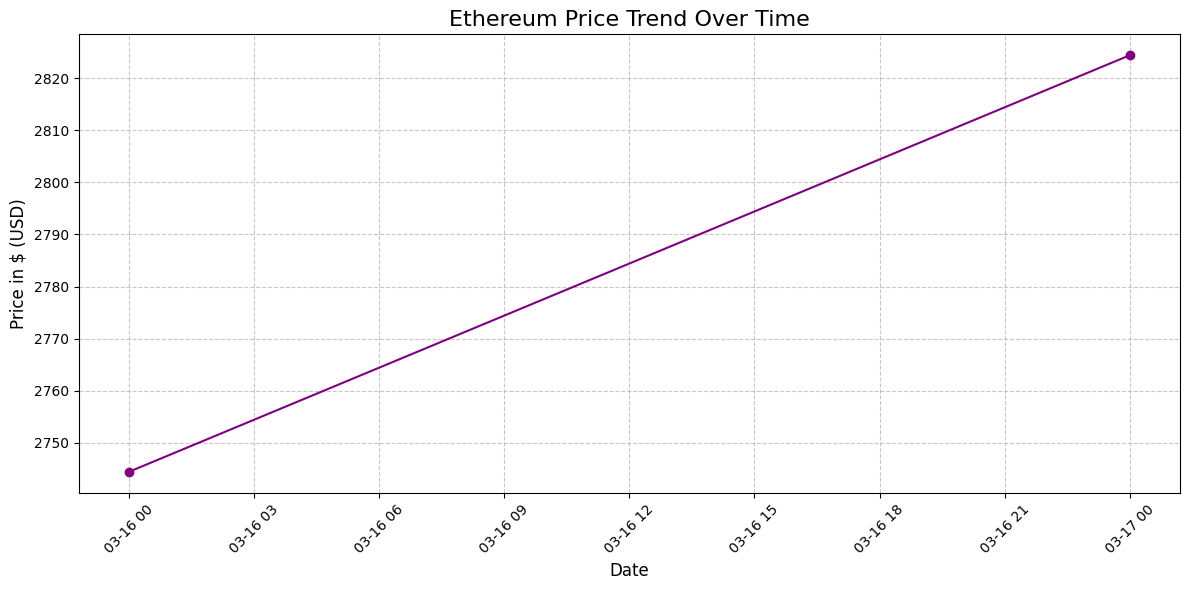

In [17]:
ethereum_data = df[df['coin'] == 'Ethereum']

plt.figure(figsize=(12, 6))
plt.plot(ethereum_data['date'], ethereum_data['price'], marker='o', linestyle='-', color='purple')
plt.title("Ethereum Price Trend Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price in $ (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
save_path = r"C:\Users\ACER\OneDrive\Documents\my codess\Data-Analytics-Assignment\Crypto-Liquidity-Prediction-ML-Project\outputs\figures\ethereum_price_trend.png"
plt.savefig(save_path)
plt.show()


### Insights from Ethereum Price Trend Over Time:

- **Smooth rising trend:** Regular price rise all the way through to the end.
- **Price range:** Increased from around $2,745 to $2,825, demonstrating around an $80 increase.
- **Timeframe:** Spans about 11 days (March 16–27).
- **Rate of growth:** Approximately 3% overall gain, averaging $7–8 rise per day.
- **Low volatility:** Straightforward, linear growth without any spikes or significant dips.
- **No corrections:** Lack of pullback or periods of consolidation.
- **Uncommon stability:** This consistent growth trend is unusual for cryptocurrency markets.

# Saving Processed Data for Feature Engineering

Once we finish the `Exploratory data analysis (EDA)` and `initial preprocessing steps`, the cleaned dataset is now ready to be saved. Saving the processed data ensures that all data cleaning and preparation up until now are all retained. This file will then be the input to the next phase of the project — feature engineering. Saving and loading this processed file helps us keep a clear and modular process, and hence the project is easier to manage and reproduce.

In [47]:
# Preview the cleaned dataframe
print(df.head())

# Save the cleaned and processed DataFrame to the specified directory
output_path = r'C:\Users\ACER\OneDrive\Documents\my codess\Data-Analytics-Assignment\Crypto-Liquidity-Prediction-ML-Project\data\processed\processed_data.csv'
df.to_csv(output_path, index=False)

print(f"EDA complete. Processed data saved successfully at:\n{output_path}")


       coin symbol         price     1h    24h     7d    24h_volume  \
0   Bitcoin    BTC  40859.460000  0.022  0.030  0.055  3.539076e+10   
1  Ethereum    ETH   2744.410000  0.024  0.034  0.065  1.974870e+10   
2    Tether   USDT      1.000000 -0.001 -0.001  0.000  5.793497e+10   
3       BNB    BNB    383.430000  0.018  0.028  0.004  1.395854e+09   
4  USD Coin   USDC      0.999874 -0.001  0.000 -0.000  3.872274e+09   

        mkt_cap       date  
0  7.709915e+11 2022-03-16  
1  3.271044e+11 2022-03-16  
2  7.996516e+10 2022-03-16  
3  6.404382e+10 2022-03-16  
4  5.222214e+10 2022-03-16  
EDA complete. Processed data saved successfully at:
C:\Users\ACER\OneDrive\Documents\my codess\Data-Analytics-Assignment\Crypto-Liquidity-Prediction-ML-Project\data\processed\processed_data.csv


# Summary of `01_data_exploration.ipynb`

## Overview
This notebook covers the initial data preparation and exploratory analysis for the Liquidity Prediction project.

## Key Steps

- Imported libraries (`pandas`, `numpy`, `matplotlib`, `seaborn`)
- Loaded and concatenated datasets for 2016 and 2017
- Explored data with `.head()`, `.info()`, and summary statistics
- Handled missing values and removed duplicates
- Converted `date` column to datetime and sorted data by date
- Performed exploratory data analysis:
  - Correlation heatmap of numerical features
  - Ethereum price trend visualization
- Saved the cleaned dataset for feature engineering

## Next Step
Proceed to `02_feature_engineering.ipynb` to create new features like moving averages, volatility, and liquidity ratios.
